In [70]:
import pandas as pd
import numpy as np

columns=['userId', 'productId', 'ratings','timestamp']
app_data = pd.read_csv('/content/drive/MyDrive/Bangkit/ratings_Electronics (1).csv/ratings_Electronics (1).csv',names=columns)

# Tampilkan beberapa baris pertama dari dataset
print(app_data.head())


           userId   productId  ratings   timestamp
0   AKM1MP6P0OYPR  0132793040      5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944      5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341      1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341      3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341      1.0  1334707200


In [71]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [72]:
app_data.isnull().sum()

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

In [73]:
#Taking subset of the dataset
app_data=app_data.iloc[:5000,0:]

In [74]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     5000 non-null   object 
 1   productId  5000 non-null   object 
 2   ratings    5000 non-null   float64
 3   timestamp  5000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 156.4+ KB


In [75]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

In [76]:
# Konversi user_id dan product_id menjadi label yang sesuai
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()
app_data['userId'] = user_encoder.fit_transform(app_data['userId'])
app_data['productId'] = product_encoder.fit_transform(app_data['productId'])

In [77]:
# Pisahkan data menjadi train set dan test set
train_data, test_data = train_test_split(app_data, test_size=0.2, random_state=42)

# Tampilkan data train
print("Data Train:")
print(train_data)

# Tampilkan data test
print("\nData Test:")
print(test_data)

Data Train:
      userId  productId  ratings   timestamp
4227    1783        216      5.0  1382659200
4676    1207        290      5.0  1381449600
800     1048         38      4.0  1340582400
3671    2300        122      5.0  1366848000
4193    3044        209      5.0  1358121600
...      ...        ...      ...         ...
4426     871        262      4.0  1279670400
466     2088         38      2.0  1355702400
3092    2901         63      5.0  1300665600
3772    1272        133      5.0  1284854400
860      290         38      5.0  1387670400

[4000 rows x 4 columns]

Data Test:
      userId  productId  ratings   timestamp
1501    4225         53      4.0  1348185600
2586     496         61      3.0  1395446400
2653    3614         61      5.0  1327968000
1055     103         38      4.0  1371340800
705      273         38      4.0  1383868800
...      ...        ...      ...         ...
4711     454        291      1.0  1298851200
2313     441         60      3.0  1383264000
3214  

In [78]:
def create_model(num_users, num_products, embedding_size=50):
    user_input = Input(shape=(1,), name='user_input')
    product_input = Input(shape=(1,), name='product_input')

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1)(user_input)
    product_embedding = Embedding(input_dim=num_products, output_dim=embedding_size, input_length=1)(product_input)

    concat = Flatten()(Concatenate()([user_embedding, product_embedding]))
    dense_1 = Dense(128, activation='relu')(concat)
    output = Dense(1)(dense_1)

    model = Model(inputs=[user_input, product_input], outputs=output)

    return model


In [79]:
num_users = len(app_data['userId'].unique())
num_products = len(app_data['productId'].unique())

model = create_model(num_users, num_products)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

In [80]:
history = model.fit(
    [train_data['userId'], train_data['productId']],
    train_data['ratings'],
    epochs=100,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
50/50 [==============================] - 4s 54ms/step - loss: 13.3978 - mse: 13.3978 - val_loss: 6.1254 - val_mse: 6.1254
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 3.1044 - mse: 3.1044 - val_loss: 2.3721 - val_mse: 2.3721
Epoch 3/100
50/50 [==============================] - 1s 11ms/step - loss: 1.6034 - mse: 1.6034 - val_loss: 2.2142 - val_mse: 2.2142
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4857 - mse: 0.4857 - val_loss: 2.3839 - val_mse: 2.3839
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 0.1054 - mse: 0.1054 - val_loss: 2.4608 - val_mse: 2.4608
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 2.4968 - val_mse: 2.4968
Epoch 7/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0632 - mse: 0.0632 - val_loss: 2.4809 - val_mse: 2.4809
Epoch 8/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0576

In [81]:

# Menilai model pada data pengujian
test_loss = model.evaluate([test_data['userId'], test_data['productId']], test_data['ratings'])
print(f'Test Loss: {test_loss}')

32/32 [==============================] - 0s 2ms/step - loss: 2.1568 - mse: 2.1568
Test Loss: [2.1567776203155518, 2.1567776203155518]


In [82]:
# Menggunakan model untuk membuat prediksi
predictions = model.predict([test_data['userId'], test_data['productId']])

# Menampilkan beberapa hasil prediksi
for i in range(10):
    print(f"Actual Rating: {test_data['ratings'].iloc[i]}, Predicted Rating: {predictions[i][0]}")


# Menghitung metrik evaluasi tambahan jika diperlukan
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data['ratings'], predictions.flatten())
print(f'Mean Squared Error on test data: {mse}')


32/32 [==============================] - 0s 2ms/step
Actual Rating: 4.0, Predicted Rating: 4.008058547973633
Actual Rating: 3.0, Predicted Rating: 3.4738597869873047
Actual Rating: 5.0, Predicted Rating: 3.3161795139312744
Actual Rating: 4.0, Predicted Rating: 4.129420280456543
Actual Rating: 4.0, Predicted Rating: 4.194271564483643
Actual Rating: 5.0, Predicted Rating: 3.7958831787109375
Actual Rating: 4.0, Predicted Rating: 4.129042625427246
Actual Rating: 1.0, Predicted Rating: 3.142287492752075
Actual Rating: 5.0, Predicted Rating: 3.308208465576172
Actual Rating: 5.0, Predicted Rating: 3.7813732624053955
Mean Squared Error on test data: 2.1567772844446416


In [84]:
# Melakukan prediksi pada data pelatihan dan validasi
train_predictions = model.predict([train_data['userId'], train_data['productId']])
val_predictions = model.predict([test_data['userId'], test_data['productId']])

# Menghitung Mean Squared Error (MSE)
train_mse = mean_squared_error(train_data['ratings'], train_predictions.flatten())
val_mse = mean_squared_error(test_data['ratings'], val_predictions.flatten())

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE) pada Data Pelatihan: {train_mse}')
print(f'Mean Squared Error (MSE) pada Data Validasi: {val_mse}')

32/32 [==============================] - 0s 2ms/step
Mean Squared Error (MSE) pada Data Pelatihan: 0.4440010379305853
Mean Squared Error (MSE) pada Data Validasi: 2.1567772844446416


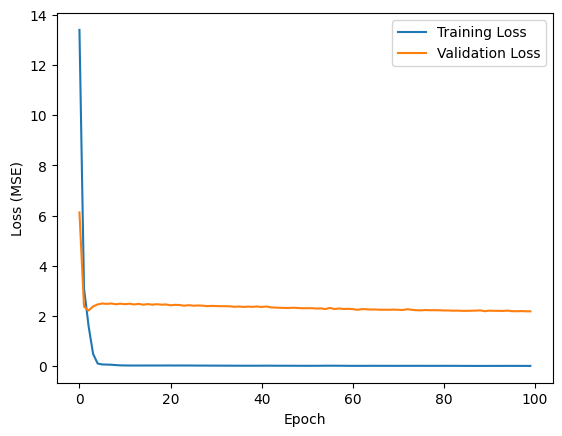

In [85]:
import matplotlib.pyplot as plt

# Plot loss untuk setiap epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [86]:
# Menghitung prediksi pada data pengujian
test_predictions = model.predict([test_data['userId'], test_data['productId']])

# Menampilkan beberapa contoh hasil prediksi
for i in range(10):  # Menampilkan 10 contoh hasil prediksi
    actual_rating = test_data['ratings'].iloc[i]
    predicted_rating = test_predictions[i][0]
    print(f"Actual Rating: {actual_rating}, Predicted Rating: {predicted_rating}")

32/32 [==============================] - 0s 2ms/step
Actual Rating: 4.0, Predicted Rating: 4.008058547973633
Actual Rating: 3.0, Predicted Rating: 3.4738597869873047
Actual Rating: 5.0, Predicted Rating: 3.3161795139312744
Actual Rating: 4.0, Predicted Rating: 4.129420280456543
Actual Rating: 4.0, Predicted Rating: 4.194271564483643
Actual Rating: 5.0, Predicted Rating: 3.7958831787109375
Actual Rating: 4.0, Predicted Rating: 4.129042625427246
Actual Rating: 1.0, Predicted Rating: 3.142287492752075
Actual Rating: 5.0, Predicted Rating: 3.308208465576172
Actual Rating: 5.0, Predicted Rating: 3.7813732624053955


In [87]:
model.save('recommender_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [88]:
from tensorflow.keras.models import load_model
import numpy as np

# Muat model dari file .h5
deployed_model = load_model('recommender_model.h5')

# Contoh pengujian
user_ids = np.array([1, 2, 3])
product_ids = np.array([10, 20, 30])

predictions = deployed_model.predict([user_ids, product_ids])

# Tampilkan hasil prediksi
for i in range(len(user_ids)):
    print(f"User {user_ids[i]} akan memberikan rating untuk Product {product_ids[i]} sebesar: {predictions[i][0]}")


1/1 [==============================] - 0s 61ms/step
User 1 akan memberikan rating untuk Product 10 sebesar: 4.188692569732666
User 2 akan memberikan rating untuk Product 20 sebesar: 2.537712335586548
User 3 akan memberikan rating untuk Product 30 sebesar: 3.194730520248413
